In [1]:
import math

beta = math.exp(-(500/60000)**2)
beta

0.9999305579667652

In [2]:
import xarray as xr  # "canonical" namespace short-hand
import pathlib
import matplotlib.pyplot as plt 

In [3]:
# Create a restart that has slightly different SWE
in_dir = pathlib.Path(
       '/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files')
in_file = in_dir / 'RESTART.2017010100_DOMAIN1'
out_file = in_dir / 'RESTART.2017010100_sneqv_plus50_DOMAIN1'
ds = xr.open_dataset(in_file)
ds['SNEQV'] = ds['SNEQV'] + 50.0
ds.to_netcdf(out_file)


In [4]:
%%time
ds = xr.open_dataset(
    in_dir / 'geometry_nwm_long_range_snow.nc', engine="netcdf4"
)
ds

CPU times: user 6.09 ms, sys: 399 µs, total: 6.49 ms
Wall time: 5.72 ms


<xarray.Dataset>
Dimensions:  (feature_id: 189, soil_layers_stag: 4, south_north: 24, west_east: 30)
Dimensions without coordinates: feature_id, soil_layers_stag, south_north, west_east
Data variables:
    HGT      (south_north, west_east) float32 ...
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    ZS       (soil_layers_stag) float32 ...
    Length   (feature_id) float32 ...
    lat      (feature_id) float32 ...
    lon      (feature_id) float32 ...
Attributes: (12/21)
    domain_dir:             /home/vagrant/jedi/domains/private/taylor_park_v2_1
    config:                 nwm_long_range_snow
    hrldas_patch_filename:  hrldas_namelist_patches.json
    hydro_patch_filename:   hydro_namelist_patches.json
    lsm_dx:                 1000.0
    lsm_dy:                 1000.0
    ...                     ...
    stream_dx_name:         Length
    stream_xdim_name:       feature_id
    stream_lat_name:        lat
    stream_lon_name:        lon
    stream_src_file:        /home/vagrant/jedi/domains/private/taylor_park_v2...
    stream_src_md5:         b43e1fa8443092671bf1338556152f04

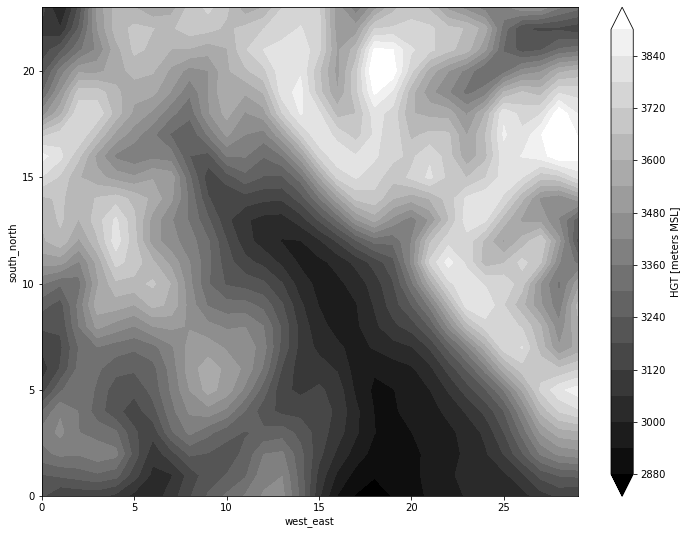

In [5]:
ds.HGT.plot.contourf(robust=True, figsize=(12, 9), levels=18, cmap="gray");
plt.savefig('topo.png', facecolor='w', dpi=100)

In [6]:
import numpy as np

topo = ds.HGT

topo = np.floor(topo)
topo = topo.astype(int)


In [7]:
%%time

bkg = xr.open_dataset(
    in_dir / 'RESTART.2017010100_sneqv_plus5_DOMAIN1_3dvar_input', engine="netcdf4"
)
bkg

CPU times: user 33.8 ms, sys: 3.63 ms, total: 37.5 ms
Wall time: 37.1 ms


<xarray.Dataset>
Dimensions:      (Time: 1, snow_layers: 3, soil_layers_stag: 4, sosn_layers: 7, south_north: 24, west_east: 30)
Dimensions without coordinates: Time, snow_layers, soil_layers_stag, sosn_layers, south_north, west_east
Data variables: (12/63)
    Times        (Time) |S19 ...
    SOIL_T       (Time, south_north, soil_layers_stag, west_east) float32 ...
    SNOW_T       (Time, south_north, snow_layers, west_east) float32 ...
    SMC          (Time, south_north, soil_layers_stag, west_east) float32 ...
    SH2O         (Time, south_north, soil_layers_stag, west_east) float32 ...
    ZSNSO        (Time, south_north, sosn_layers, west_east) float32 ...
    ...           ...
    QSPRINGXY    (Time, south_north, west_east) float32 ...
    FDEPTHXY     (Time, south_north, west_east) float32 ...
    RIVERCONDXY  (Time, south_north, west_east) float32 ...
    RIVERBEDXY   (Time, south_north, west_east) float32 ...
    EQZWT        (Time, south_north, west_east) float32 ...
    PEXPXY       (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:          RESTART FILE FROM HRLDAS v20150506
    missing_value:  -1e+33
    START_DATE:     2007-10-01_00:00:00
    MAP_PROJ:       1
    LAT1:           38.83563
    LON1:           -106.78017
    DX:             1000.0
    DY:             1000.0
    TRUELAT1:       30.0
    TRUELAT2:       60.0
    STAND_LON:      -97.0
    MMINLU:         USGS

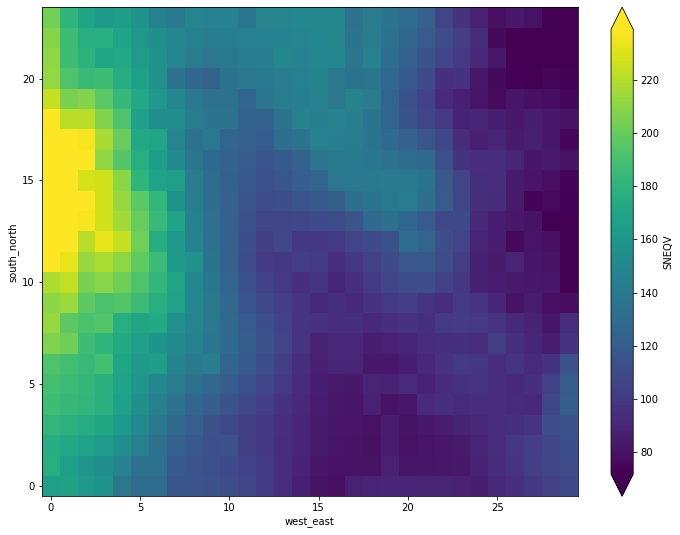

In [8]:
bkg.SNEQV.plot(robust=True, figsize=(12, 9));

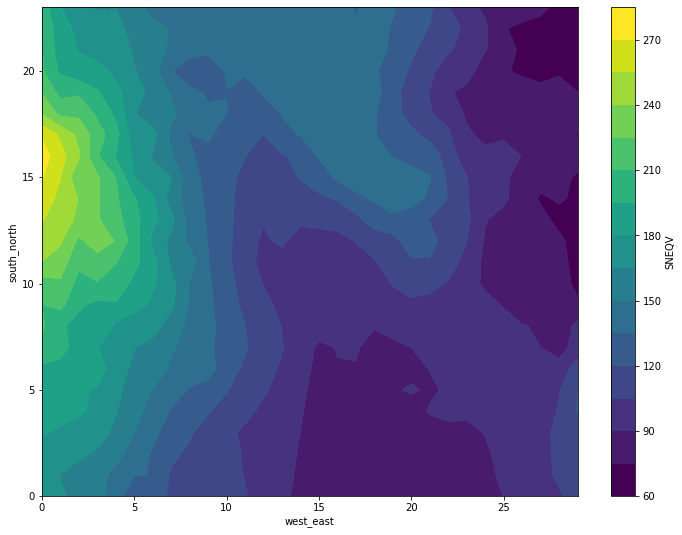

In [9]:
toplot = bkg.SNEQV.squeeze("Time")
toplot.plot.contourf(figsize=(12, 9), levels=20)

In [10]:
%%time

out_dir = pathlib.Path(
       '/glade/u/home/afox/work/jedi/jedi_exec_experiments/output')

ana = xr.open_dataset(
    out_dir / "3dvar/analysis.nc", engine="netcdf4"
)
ana

CPU times: user 32.2 ms, sys: 4.03 ms, total: 36.3 ms
Wall time: 35.6 ms


<xarray.Dataset>
Dimensions:      (Time: 1, snow_layers: 3, soil_layers_stag: 4, sosn_layers: 7, south_north: 24, west_east: 30)
Dimensions without coordinates: Time, snow_layers, soil_layers_stag, sosn_layers, south_north, west_east
Data variables: (12/63)
    Times        (Time) |S19 ...
    SOIL_T       (Time, south_north, soil_layers_stag, west_east) float32 ...
    SNOW_T       (Time, south_north, snow_layers, west_east) float32 ...
    SMC          (Time, south_north, soil_layers_stag, west_east) float32 ...
    SH2O         (Time, south_north, soil_layers_stag, west_east) float32 ...
    ZSNSO        (Time, south_north, sosn_layers, west_east) float32 ...
    ...           ...
    QSPRINGXY    (Time, south_north, west_east) float32 ...
    FDEPTHXY     (Time, south_north, west_east) float32 ...
    RIVERCONDXY  (Time, south_north, west_east) float32 ...
    RIVERBEDXY   (Time, south_north, west_east) float32 ...
    EQZWT        (Time, south_north, west_east) float32 ...
    PEXPXY       (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:          RESTART FILE FROM HRLDAS v20150506
    missing_value:  -1e+33
    START_DATE:     2007-10-01_00:00:00
    MAP_PROJ:       1
    LAT1:           38.83563
    LON1:           -106.78017
    DX:             1000.0
    DY:             1000.0
    TRUELAT1:       30.0
    TRUELAT2:       60.0
    STAND_LON:      -97.0
    MMINLU:         USGS

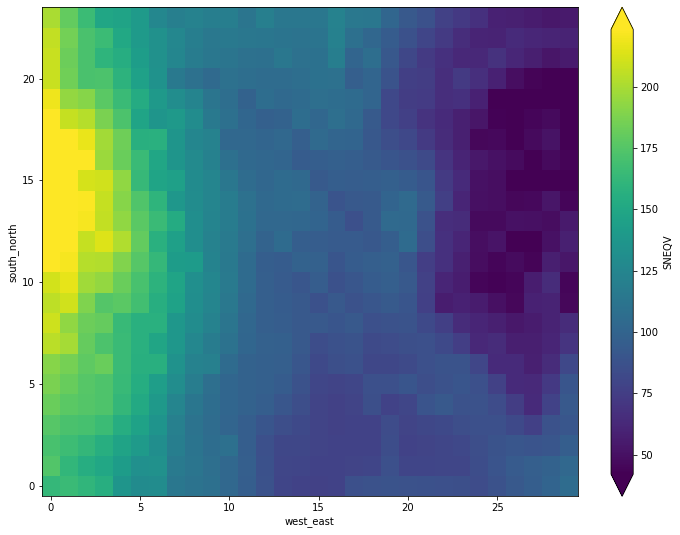

In [11]:
ana.SNEQV.plot(robust=True, figsize=(12, 9));

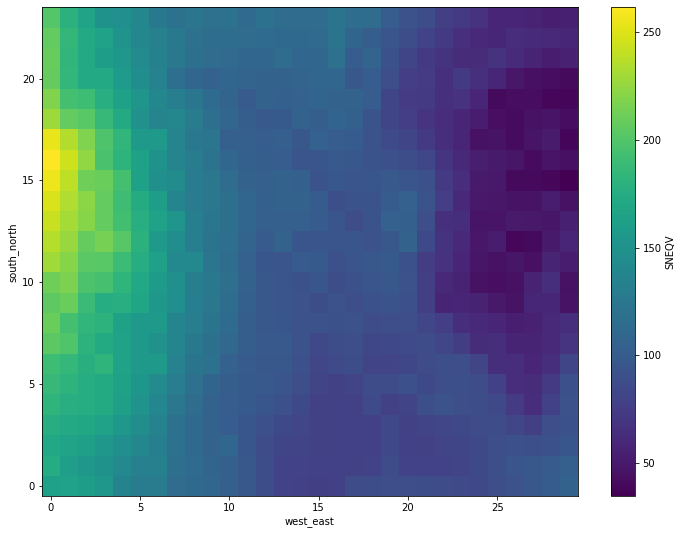

In [12]:
ana.SNEQV.plot(figsize=(12, 9));

In [13]:
increment = ana.SNEQV - bkg.SNEQV

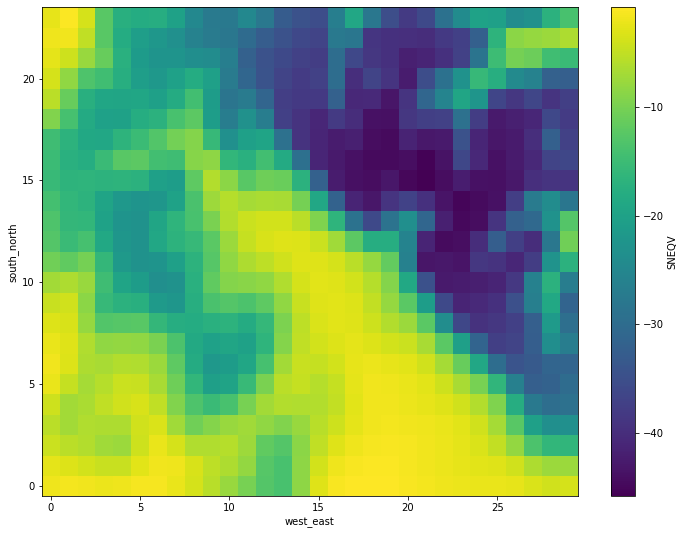

In [14]:
increment.plot(figsize=(12, 9));

In [15]:
flat = increment.squeeze("Time")

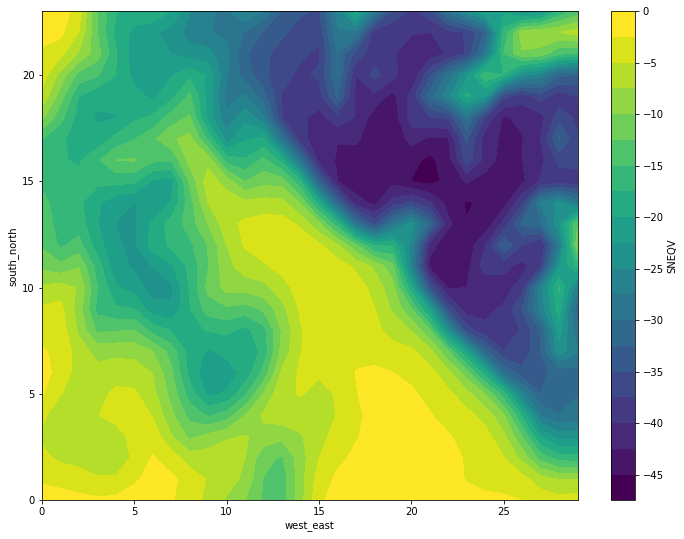

In [16]:

flat.plot.contourf(figsize=(12, 9), levels=20)
plt.savefig('increment.png', facecolor='w', dpi=100)